Test de mi perceptron

In [23]:
import numpy as np
from main import producto
from main import Perceptron 

x_0 =  [
        # np.matrix([[10.0, 0.0, ],
        #           [0.0, 10.0 ],
        #           [0.0, 0.0  ]]), 

        np.array([[0.0, 0.0, 0.0, 0.0],
                  [0.0, 0.0, 0.0, 0.0],
                  [0.0, 0.0, 0.0, 0.0]]),

        np.matrix([[10.0],
                  [3.0], 
                  [-0.0],
                  [-1.0],
                  [10.0]]), 
        
        # np.matrix([[10.0], 
        #             [-0.0]])
        ]
perceptron = Perceptron(x_0)
perceptron.predecir_dato([1,1])
print(perceptron)

dim_input  =  2
dim_output =  1
[array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]), matrix([[10.],
        [ 3.],
        [-0.],
        [-1.],
        [10.]])]


Error inicial =  49.99998874648521


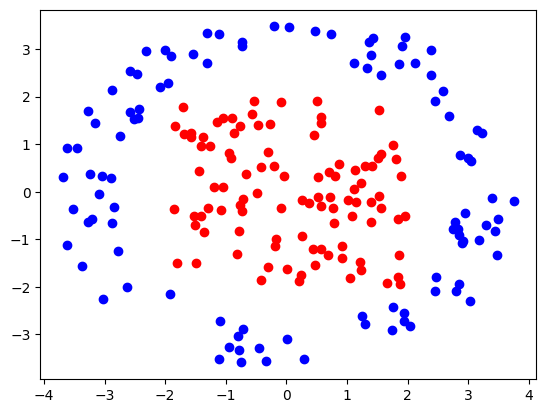

In [24]:
import random
import math
from math import pi as pi 
import matplotlib.pyplot as plt    

aux = random.random()
set2 = []
set1 = []
lados = [[2,0],[0,2],[2,2]] 
for j in range(100):
    x = random.random()-1/2
    y = random.random()-1/2
    set1.append([[x*4,y*4],0])
    theta = random.random()*2*pi
    r = 2.8284271247461903 + random.random()
    set2.append([[math.sin(theta)*r,math.cos(theta)*r],1])
datos = set1 + set2
for dat in datos:
        if dat[1] == 0:
                plt.scatter(dat[0][0], dat[0][1], color = 'r')
        else:
                plt.scatter(dat[0][0],dat[0][1],color = 'b')
error_0 = perceptron.error(datos)
print("Error inicial = ", error_0)         

In [ ]:
import random

for index,dat in enumerate(datos):
    index2        = random.randrange(0, len(datos),1)
    aux           = datos[index2]
    datos[index2] = dat
    datos[index]  = aux

In [28]:
errores     = [error_0]
iteraciones = 10000
historial   = iteraciones // 10 
for j in range(iteraciones):
    if j%historial == 0:
        aux     = perceptron.fit(datos, tam_paso=1.0, historial=True)
        errores = errores + aux
    perceptron.fit(datos, tam_paso=1.0, historial=False)
print(perceptron)

dim_input  =  2
dim_output =  1
[array([[ -7.92904789,  10.87899743,  -5.69019863,  -0.59103711],
       [  1.08418531,  -9.50584053,   5.53897593,   7.9970353 ],
       [-17.72316008, -17.73815963, -17.53442705, -17.59969722]]), matrix([[ 30.54621188],
        [ 19.63126008],
        [  0.97240481],
        [ 35.01651454],
        [-18.58001668]])]


Len datos             =  200
Error                 =  7.739775085333907
Presicion             =  0.8857142857142857
Exactitud             =  0.905
Error_0 - Error final = 42.2602136611513


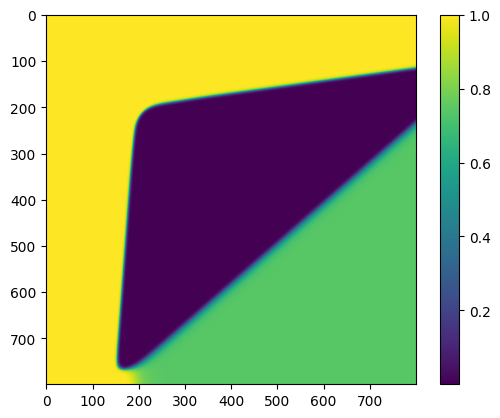

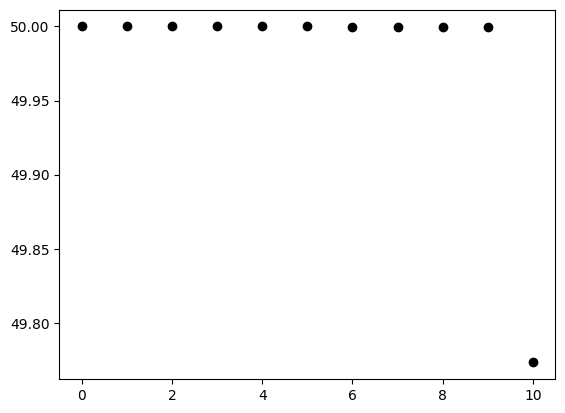

In [32]:
def function(x,y):
    l = []
    for (j, i) in zip(x, y):
        for ii, jj in zip(i,j):            
            l.append(perceptron.predecir_dato([ii,-jj])[0])
            
    return l

import matplotlib.pyplot as plt    
plt.figure()

x = np.arange(-4, 4, 0.01)
y = np.arange(-4, 4, 0.01)
X, Y = np.meshgrid(x, y)

fxy = function(X, Y) 
fxy = np.array(fxy)
fxy = fxy.reshape(len(x), len(y))

print("Len datos             = ", len(datos))
print("Error                 = ", perceptron.error(datos))
print("Presicion             = ", perceptron.presicion(datos))
print("Exactitud             = ", perceptron.exactitud(datos))
print("Error_0 - Error final =", error_0 - perceptron.error(datos))

plt.imshow(fxy);
plt.colorbar();
plt.show()

for x, y in enumerate(errores):
    plt.plot(x, y, '-ok')